In [ ]:
!pip install torch
!pip install torchvision
!pip install matplotlib

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [32]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [4]:
bs = 64
train_dl = DataLoader(training_data, batch_size=bs)
test_dl = DataLoader(test_data, batch_size=bs)


In [19]:
train_dl.dataset[0][0].shape # 28 x 28 images

torch.Size([1, 28, 28])

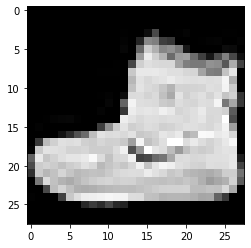

In [27]:
import matplotlib.pyplot as plt
plt.imshow(train_dl.dataset[0][0].numpy().squeeze(), cmap="gray")

In [28]:
for X, y in test_dl:
  print(f'Shape of X [N, C, H, W]: {X.shape}')
  print(f'Shape of y [N]: {y.shape} {y.dtype}')

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y [N]: torch.Size([64]) torch.int64
Shape of X [N, C, H,

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [34]:
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512),
      nn.ReLU(),
      nn.Linear(512, 512),
      nn.ReLU(),
      nn.Linear(512, 10),
    )
  
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NN().to(device)
print(model)

NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [37]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # 0.001

In [43]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device) # independent vars (img), dependent vars (actuals)

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Bcakpropagate
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
    

In [44]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    # Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward()
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [45]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}/{epochs}\n")
  train(train_dl, model, loss_fn, optimizer)
  test(test_dl, model, loss_fn)

print("Done")

Epoch 1/5

loss: 2.307292 [    0/60000]
loss: 2.306511 [ 6400/60000]
loss: 2.284371 [12800/60000]
loss: 2.272700 [19200/60000]
loss: 2.264800 [25600/60000]
loss: 2.232742 [32000/60000]
loss: 2.241955 [38400/60000]
loss: 2.214750 [44800/60000]
loss: 2.211560 [51200/60000]
loss: 2.174057 [57600/60000]
Test Error: 
 Accuracy: 35.7%, Avg loss: 2.176182 

Epoch 2/5

loss: 2.189626 [    0/60000]
loss: 2.189616 [ 6400/60000]
loss: 2.129885 [12800/60000]
loss: 2.141274 [19200/60000]
loss: 2.109900 [25600/60000]
loss: 2.044313 [32000/60000]
loss: 2.076156 [38400/60000]
loss: 2.006998 [44800/60000]
loss: 2.008940 [51200/60000]
loss: 1.932645 [57600/60000]
Test Error: 
 Accuracy: 57.6%, Avg loss: 1.936756 

Epoch 3/5

loss: 1.971336 [    0/60000]
loss: 1.948920 [ 6400/60000]
loss: 1.831878 [12800/60000]
loss: 1.866642 [19200/60000]
loss: 1.766349 [25600/60000]
loss: 1.709656 [32000/60000]
loss: 1.733891 [38400/60000]
loss: 1.634309 [44800/60000]
loss: 1.645514 [51200/60000]
loss: 1.538868 [57600/

In [46]:
torch.save(model.state_dict(), "model.pth")
print("saved model")

saved model


In [47]:
model = NN()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

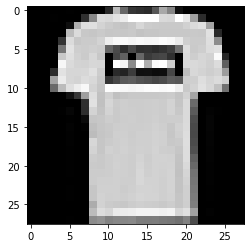

In [53]:
plt.imshow(train_dl.dataset[1][0].numpy().squeeze(), cmap="gray")

In [54]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[1][0], test_data[1][1]
with torch.no_grad():
    pred = model(x)
    print(pred)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

tensor([[ 0.7539, -2.7455,  3.6787, -1.3823,  3.3724, -1.9734,  2.7345, -3.6673,
          1.7058, -2.2780]])
Predicted: "Pullover", Actual: "Pullover"


In [55]:
pred[0].argmax(0)

tensor(2)